In [1]:
# !pip install mrmr_selection

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from google.colab import drive
from itertools import cycle

In [2]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/final/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [3]:
df= pd.read_csv(location+'bank-database.csv', sep = ',')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df = df.drop(["duration"],axis=1)

df['job'].replace(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
                        [0, 1, 2, 3, 4 ,5 ,6 ,7 ,8 ,9 ,1, 11], inplace=True)
df['marital'].replace(['divorced', 'married', 'single', 'unknown'],
                        [0, 1, 2, 3], inplace=True)
df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate', 'professional.course' , 'university.degree', 'unknown'],
                        [0, 1, 2, 3, 4, 5 ,6, 7], inplace=True)
df['default'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['housing'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['loan'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['contact'].replace(['cellular', 'telephone'],
                        [0, 1], inplace=True)
df['month'].replace(['jan', 'feb',  'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],
                        [0,1,2,3,4], inplace=True)
df['poutcome'].replace(['failure', 'nonexistent',  'success'],
                        [0,1,2], inplace=True)
df['y'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

df
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
y = df[['y']]
X = df.drop('y', axis=1)

In [6]:
# split the data in 80% train-20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, stratify=y)

In [8]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
22757,30,9,0,6,0,0,0,0,7,0,5,999,0,1,1.4,93.444,-36.1,4.965,5228.1
33618,42,7,2,1,0,1,0,0,4,2,5,999,0,1,-1.8,92.893,-46.2,1.281,5099.1
31765,32,9,2,3,0,1,0,0,4,3,2,999,0,1,-1.8,92.893,-46.2,1.327,5099.1
17451,40,1,1,5,0,1,1,0,6,0,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1
39716,45,6,1,3,0,0,0,0,4,4,1,999,1,0,-1.8,93.876,-40.0,0.695,5008.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37342,27,0,2,6,0,1,0,0,7,1,1,999,0,1,-2.9,92.201,-31.4,0.883,5076.2
23322,43,6,1,6,0,1,0,0,7,2,1,999,0,1,1.4,93.444,-36.1,4.964,5228.1
4372,51,0,1,1,2,0,0,1,4,1,1,999,0,1,1.1,93.994,-36.4,4.856,5191.0
12026,58,5,2,5,0,1,0,1,5,3,3,999,0,1,1.4,94.465,-41.8,4.955,5228.1


In [9]:
y_train

,y
21127,0
34908,0
14498,0
28102,0
13794,0
...,...
29343,0
31203,0
37335,0
24871,0


In [10]:
y_test

,y
22757,0
33618,0
31765,0
17451,1
39716,1
...,...
37342,0
23322,0
4372,0
12026,0


In [11]:
# from mrmr import mrmr_regression

# selected_features = mrmr_regression(X_train, y_train, K = 19)
# selected_features

In [12]:
!pip install pymrmr
import pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
s = pymrmr.mRMR(X_train, 'MID', 19)
s

['job',
 'marital',
 'cons.conf.idx',
 'campaign',
 'default',
 'pdays',
 'day_of_week',
 'loan',
 'education',
 'housing',
 'previous',
 'contact',
 'euribor3m',
 'poutcome',
 'cons.price.idx',
 'emp.var.rate',
 'month',
 'nr.employed',
 'age']

In [14]:
# arrange the data accroding to best features

X_train = X_train[['job',
 'marital',
 'cons.conf.idx',
 'campaign',
 'default',
 'pdays',
 'day_of_week',
 'loan',
 'education',
 'previous',
 'housing',
 'contact',
 'euribor3m',
 'poutcome',
 'cons.price.idx',
 'emp.var.rate',
 'month',
 'nr.employed',
 'age']]
X_train

,job,marital,cons.conf.idx,campaign,default,pdays,day_of_week,loan,education,previous,housing,contact,euribor3m,poutcome,cons.price.idx,emp.var.rate,month,nr.employed,age
21127,0,1,-36.1,2,0,999,0,1,6,0,1,0,4.963,1,93.444,1.4,7,5228.1,32
34908,1,2,-46.2,1,0,999,4,0,2,0,1,0,1.250,1,92.893,-1.8,4,5099.1,36
14498,1,1,-42.7,3,0,999,1,0,0,0,1,0,4.961,1,93.918,1.4,6,5228.1,37
28102,7,1,-47.1,1,0,999,4,1,1,0,0,0,1.479,1,93.075,-1.8,3,5099.1,49
13794,9,1,-42.7,7,0,999,3,0,6,0,0,1,4.963,1,93.918,1.4,6,5228.1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29343,7,2,-47.1,2,0,999,4,0,3,0,1,0,1.405,1,93.075,-1.8,3,5099.1,33
31203,9,2,-46.2,1,0,999,2,1,5,0,1,0,1.334,1,92.893,-1.8,4,5099.1,28
37335,9,2,-31.4,1,0,999,1,1,5,0,1,0,0.883,1,92.201,-2.9,7,5076.2,29
24871,4,2,-42.0,1,2,999,1,0,3,0,0,1,4.153,1,93.200,-0.1,10,5195.8,39


In [15]:
X_test = X_test[['job',
 'marital',
 'cons.conf.idx',
 'campaign',
 'default',
 'pdays',
 'day_of_week',
 'loan',
 'education',
 'previous',
 'housing',
 'contact',
 'euribor3m',
 'poutcome',
 'cons.price.idx',
 'emp.var.rate',
 'month',
 'nr.employed',
 'age']]
X_test

,job,marital,cons.conf.idx,campaign,default,pdays,day_of_week,loan,education,previous,housing,contact,euribor3m,poutcome,cons.price.idx,emp.var.rate,month,nr.employed,age
22757,9,0,-36.1,5,0,999,0,0,6,0,0,0,4.965,1,93.444,1.4,7,5228.1,30
33618,7,2,-46.2,5,0,999,2,0,1,0,1,0,1.281,1,92.893,-1.8,4,5099.1,42
31765,9,2,-46.2,2,0,999,3,0,3,0,1,0,1.327,1,92.893,-1.8,4,5099.1,32
17451,1,1,-42.7,1,0,999,0,1,5,0,1,0,4.962,1,93.918,1.4,6,5228.1,40
39716,6,1,-40.0,1,0,999,4,0,3,1,0,0,0.695,0,93.876,-1.8,4,5008.7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37342,0,2,-31.4,1,0,999,1,0,6,0,1,0,0.883,1,92.201,-2.9,7,5076.2,27
23322,6,1,-36.1,1,0,999,2,0,6,0,1,0,4.964,1,93.444,1.4,7,5228.1,43
4372,0,1,-36.4,1,2,999,1,0,1,0,0,1,4.856,1,93.994,1.1,4,5191.0,51
12026,5,2,-41.8,3,0,999,3,0,5,0,1,1,4.955,1,94.465,1.4,5,5228.1,58


In [10]:
def f_performance(classifier): 
  max_accuracy_features = max(classifier, key=classifier.get)
  print("No of features that gives best accuracy",max_accuracy_features)
  print("Best Accuracy", classifier[max_accuracy_features])
  conf = matrix.get(max_accuracy_features)
  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

  # confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=conf)
  disp.plot()
  plt.show()

  # Performance - Sensitivity, Specificity, F1_score, Precision
  tn, fp, fn, tp = conf.ravel()

  spec = tn / (tn + fp)
  print("Specificity: ", spec)

  sens = tp / (tp + fn)
  print("Sensitivity", sens)

  PPV = tp/(tp+fp)
  print("Precision", PPV)

  f1_score = (2*PPV*sens)/(PPV+sens)
  print("F1_score",f1_score)

  print(AUC.get(max_accuracy_features))

In [17]:
SVM={}
matrix = {}
AUC = {}
model = SVC()
for i in range(1, 20):
  model.fit(X_train.iloc[:, 0:i].values, y_train)
  y_pred_X_test= model.predict(X_test.iloc[:, 0:i].values)
  accura = accuracy_score(y_test, y_pred_X_test)
  SVM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [18]:
SVM

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8986404467103666,
 7: 0.8986404467103666,
 8: 0.8986404467103666,
 9: 0.8986404467103666,
 10: 0.8986404467103666,
 11: 0.8986404467103666,
 12: 0.8986404467103666,
 13: 0.8986404467103666,
 14: 0.8986404467103666,
 15: 0.8986404467103666,
 16: 0.8986404467103666,
 17: 0.8986404467103666,
 18: 0.8986404467103666,
 19: 0.8986404467103666}

No of features that gives best accuracy 6
Best Accuracy 0.8986404467103666


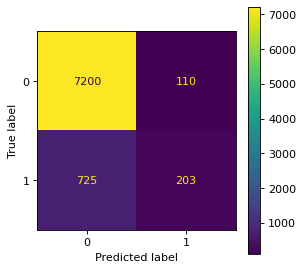

Specificity:  0.9849521203830369
Sensitivity 0.21875
Precision 0.6485623003194888
F1_score 0.32715551974214346
0.6018510601915185


In [19]:
f_performance(SVM)

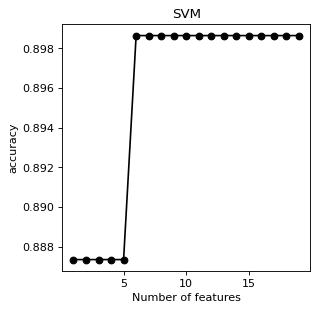

In [20]:
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, SVM.values(), '-ok',)
plt.title("SVM")
plt.show()

In [21]:
from sklearn.cluster import KMeans
KMEANS={}
matrix = {}
AUC = {}
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
for i in range(1, 20):
  kmeans.fit(X_train.iloc[:, 0:i].values, y_train)
  y_pred_X_test= kmeans.predict(X_test.iloc[:, 0:i].values)
  accura = accuracy_score(y_test, y_pred_X_test)
  KMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [22]:
KMEANS

{1: 0.6160475843651372,
 2: 0.6160475843651372,
 3: 0.41005098324836126,
 4: 0.4102937606215101,
 5: 0.4102937606215101,
 6: 0.8986404467103666,
 7: 0.8986404467103666,
 8: 0.8986404467103666,
 9: 0.8986404467103666,
 10: 0.8986404467103666,
 11: 0.8986404467103666,
 12: 0.8986404467103666,
 13: 0.8986404467103666,
 14: 0.8986404467103666,
 15: 0.8986404467103666,
 16: 0.8986404467103666,
 17: 0.8986404467103666,
 18: 0.8986404467103666,
 19: 0.8986404467103666}

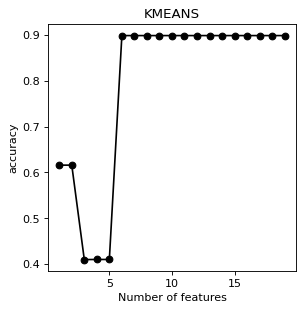

In [23]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, KMEANS.values(), '-ok',)
plt.title("KMEANS")
plt.show()

No of features that gives best accuracy 6
Best Accuracy 0.8986404467103666


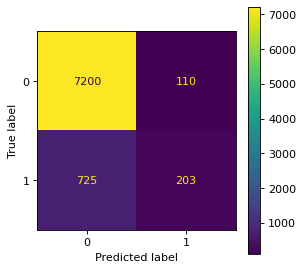

Specificity:  0.9849521203830369
Sensitivity 0.21875
Precision 0.6485623003194888
F1_score 0.32715551974214346
0.6018510601915185


In [24]:
f_performance(KMEANS)

In [25]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from fcmeans import FCM
fcmModel = FCM(n_clusters=2, random_state=1)
FCMEANS={}
matrix = {}
AUC = {}
for i in range(1, 20):
  fcmModel.fit(X_train.iloc[:, 0:i].values)
  y_pred_X_test= fcmModel.predict(X_test.iloc[:, 0:i].values)
  accura = accuracy_score(y_test, y_pred_X_test)
  FCMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [27]:
FCMEANS

{1: 0.6160475843651372,
 2: 0.6160475843651372,
 3: 0.5916484583636805,
 4: 0.5914056809905317,
 5: 0.5911629036173829,
 6: 0.8986404467103666,
 7: 0.8986404467103666,
 8: 0.8986404467103666,
 9: 0.8986404467103666,
 10: 0.8986404467103666,
 11: 0.8986404467103666,
 12: 0.8986404467103666,
 13: 0.8986404467103666,
 14: 0.8986404467103666,
 15: 0.8986404467103666,
 16: 0.8986404467103666,
 17: 0.8986404467103666,
 18: 0.28004369992716677,
 19: 0.28004369992716677}

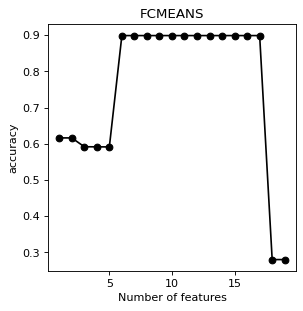

In [28]:
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, FCMEANS.values(), '-ok',)
plt.title("FCMEANS")
plt.show()

No of features that gives best accuracy 6
Best Accuracy 0.8986404467103666


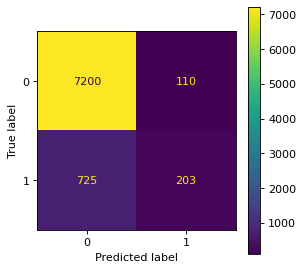

Specificity:  0.9849521203830369
Sensitivity 0.21875
Precision 0.6485623003194888
F1_score 0.32715551974214346
0.6018510601915185


In [29]:
f_performance(FCMEANS)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abcModel = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
AdaBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  abcModel.fit(X_train.iloc[:, 0:i].values, y_train)
  y_pred_X_test= abcModel.predict(X_test.iloc[:, 0:i].values)
  accura = accuracy_score(y_test, y_pred_X_test)
  AdaBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [31]:
AdaBoost

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.9003398883224083,
 7: 0.8998543335761107,
 8: 0.8998543335761107,
 9: 0.8999757222626851,
 10: 0.8998543335761107,
 11: 0.8998543335761107,
 12: 0.8999757222626851,
 13: 0.9013109978150037,
 14: 0.9014323865015781,
 15: 0.8998543335761107,
 16: 0.8994901675163874,
 17: 0.9004612770089827,
 18: 0.9017965525613013,
 19: 0.8994901675163874}

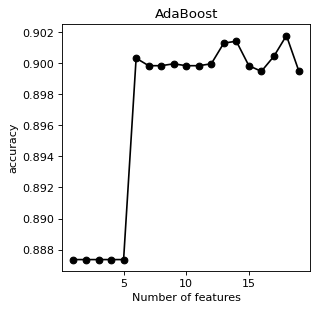

In [32]:
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, AdaBoost.values(), '-ok',)
plt.title("AdaBoost")
plt.show()

No of features that gives best accuracy 18
Best Accuracy 0.9017965525613013


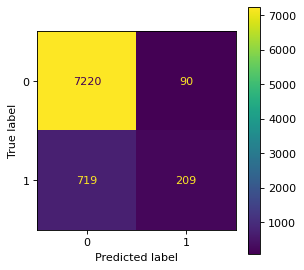

Specificity:  0.987688098495212
Sensitivity 0.2252155172413793
Precision 0.6989966555183946
F1_score 0.3406682966585167
0.6064518078682956


In [33]:
f_performance(AdaBoost)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
# Create adaboost classifer object
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.05)

GradientBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  gbc.fit(X_train.iloc[:, 0:i], y_train)
  y_pred_X_test= gbc.predict(X_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  GradientBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [35]:
GradientBoost

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.888443797038116,
 4: 0.888443797038116,
 5: 0.888443797038116,
 6: 0.8994901675163874,
 7: 0.8998543335761107,
 8: 0.8999757222626851,
 9: 0.9002184996358339,
 10: 0.8998543335761107,
 11: 0.8998543335761107,
 12: 0.8998543335761107,
 13: 0.8998543335761107,
 14: 0.9003398883224083,
 15: 0.8994901675163874,
 16: 0.8998543335761107,
 17: 0.8999757222626851,
 18: 0.8997329448895363,
 19: 0.8998543335761107}

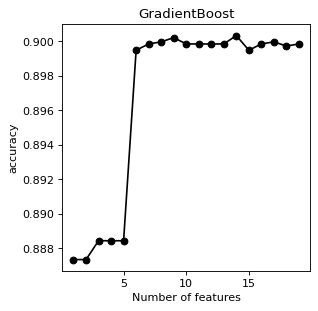

In [36]:
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(GradientBoost.keys(), GradientBoost.values(), '-ok',)
plt.title("GradientBoost")
plt.show()

No of features that gives best accuracy 14
Best Accuracy 0.9003398883224083


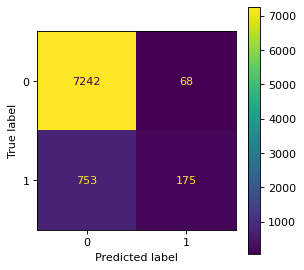

Specificity:  0.9906976744186047
Sensitivity 0.18857758620689655
Precision 0.720164609053498
F1_score 0.29888983774551664
0.5896376303127506


In [37]:
f_performance(GradientBoost)

In [38]:
from xgboost import XGBClassifier
        
xgb_clf = XGBClassifier(n_estimators=50,learning_rate=0.05)

XGBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  xgb_clf.fit(X_train.iloc[:, 0:i], y_train)
  y_pred_X_test= xgb_clf.predict(X_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  XGBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [39]:
XGBoost

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8907501820830298,
 4: 0.8920854576353484,
 5: 0.8922068463219228,
 6: 0.8992473901432386,
 7: 0.8997329448895363,
 8: 0.8994901675163874,
 9: 0.8986404467103666,
 10: 0.900825443068706,
 11: 0.9013109978150037,
 12: 0.9005826656955572,
 13: 0.900825443068706,
 14: 0.9000971109492595,
 15: 0.9015537751881525,
 16: 0.9011896091284293,
 17: 0.9014323865015781,
 18: 0.9020393299344501,
 19: 0.9016751638747269}

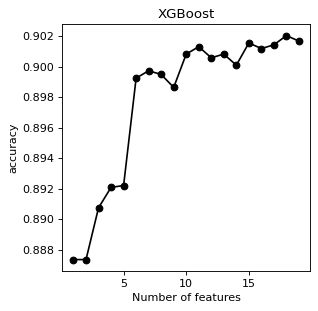

In [40]:
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, XGBoost.values(), '-ok',)
plt.title("XGBoost")
plt.show()

No of features that gives best accuracy 18
Best Accuracy 0.9020393299344501


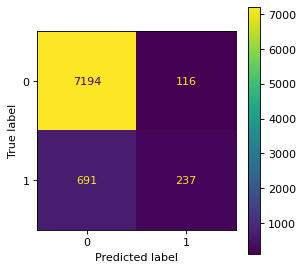

Specificity:  0.9841313269493844
Sensitivity 0.25538793103448276
Precision 0.6713881019830028
F1_score 0.3700234192037471
0.6197596289919336


In [41]:
f_performance(XGBoost)

In [42]:
max(list(SVM.items()))

(19, 0.8986404467103666)

In [43]:
cycol = cycle('bgrcmk')
def plot_combined_accuracy():
    m=np.arange(1,20)
    plt.xlabel("Features",fontsize=18)
    plt.ylabel("accuracy",fontsize=18)
    plt.plot(SVM.keys(), SVM.values(),  c=next(cycol), label="SVM");
    plt.plot(KMEANS.keys(), KMEANS.values(), c=next(cycol), label="KMEANS");
    plt.plot(FCMEANS.keys(), FCMEANS.values(), c=next(cycol), label="FCMEANS");
    plt.plot(AdaBoost.keys(), AdaBoost.values(), c=next(cycol), label="AdaBoost");
    plt.plot(GradientBoost.keys(), GradientBoost.values(), c=next(cycol), label="GradientBoost");
    plt.plot(XGBoost.keys(), XGBoost.values(), c=next(cycol), label="XGBoost");
    plt.legend()
    plt.show()

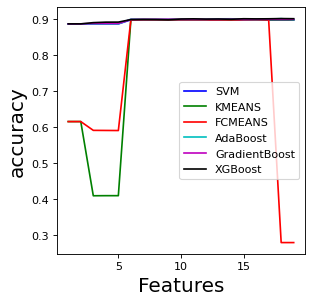

In [44]:
plot_combined_accuracy()

HMM

In [45]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [46]:
class0 = df[df['y'] == 0]
class1 = df[df['y'] == 1]

In [47]:
class0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41182,29,1,2,0,0,1,0,0,10,4,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [48]:
class1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,1,0,0,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
83,49,2,1,6,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
88,49,9,1,2,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
129,41,9,1,5,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
139,45,1,1,2,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,5,1,6,0,1,0,0,10,3,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6,1
41178,62,5,1,6,0,0,0,0,10,3,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,1
41181,37,0,1,6,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41183,73,5,1,5,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [49]:
x_class0 = class0.drop('y', axis=1)
y_class0 = class0[['y']]
x_class0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,2,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29,1,2,0,0,1,0,0,10,4,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,1,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [50]:
x_class1 = class1.drop('y', axis=1)
y_class1 = class1[['y']]
x_class1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
75,41,1,0,0,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
83,49,2,1,6,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
88,49,9,1,2,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
129,41,9,1,5,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
139,45,1,1,2,2,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,5,1,6,0,1,0,0,10,3,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6
41178,62,5,1,6,0,0,0,0,10,3,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6
41181,37,0,1,6,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41183,73,5,1,5,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [51]:
x_trainc0, x_testc0, y_trainc0, y_testc0 = train_test_split(x_class0, y_class0, test_size=0.2, random_state=0)
x_trainc1, x_testc1, y_trainc1, y_testc1  = train_test_split(x_class1, y_class1, test_size=0.2, random_state=0)

In [54]:
model0=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)
model1=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)

In [ ]:
x_test = np.concatenate((x_testc0, x_testc1))
y_test = np.concatenate((y_testc0, y_testc1))

pred_prob0 = model0.predict_proba(x_test)
pred_prob1 = model1.predict_proba(x_test)

predict_proba_c0 = np.max(model0.predict_proba(x_test), axis=1)
predict_proba_c1 = np.max(model1.predict_proba(x_test), axis=1)

In [ ]:
pred_prob = np.column_stack((predict_proba_c0,predict_proba_c1,predict_proba_c2,predict_proba_c0))

In [7]:
HMM = {}
matrix = {}
AUC = {}

for i in range(1, 20):
  model0.fit(X_train.iloc[:, 0:i], y_train)
  y_pred_X_test= model0.predict(X_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  HMM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

HMM

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{1: 0.8871085214857976,
 2: 0.8874726875455208,
 3: 0.8873512988589464,
 4: 0.8871085214857976,
 5: 0.8871085214857976,
 6: 0.8871085214857976,
 7: 0.8871085214857976,
 8: 0.8873512988589464,
 9: 0.8868657441126487,
 10: 0.887229910172372,
 11: 0.8869871327992231,
 12: 0.8996115562029618,
 13: 0.9004612770089827,
 14: 0.8994901675163874,
 15: 0.900825443068706,
 16: 0.9014323865015781,
 17: 0.9010682204418549,
 18: 0.9016751638747269,
 19: 0.9010682204418549}

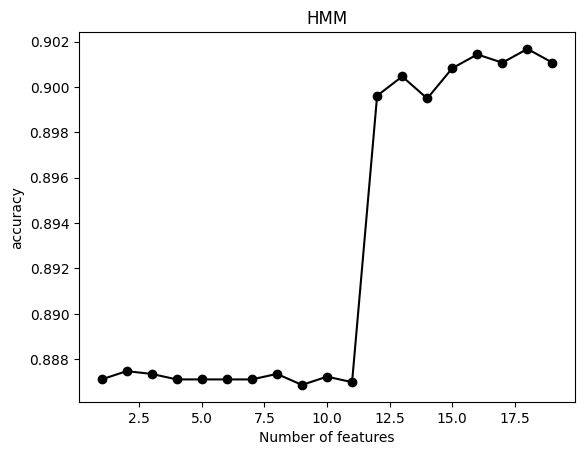

In [8]:
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(HMM.keys(), HMM.values(), '-ok',)
plt.title("HMM")
plt.show()

No of features that gives best accuracy 18
Best Accuracy 0.9016751638747269


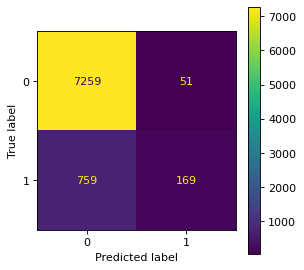

Specificity:  0.9930232558139535
Sensitivity 0.18211206896551724
Precision 0.7681818181818182
F1_score 0.29442508710801396
0.5875676623897353


In [11]:
f_performance(HMM)